<a href="https://colab.research.google.com/github/HamiltonLROliveira/ciencia_dados_puc_rj/blob/main/anal_expl_viagens_gov_federal_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Importação de pacotes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
from datetime import datetime

In [51]:
# Carrega arquivo csv usando Pandas usando uma URL

# Informa a URL de importação do dataset
url = "https://raw.githubusercontent.com/HamiltonLROliveira/ciencia_dados_puc_rj/main/2023_Passagem.zip"

# Lê o arquivo utilizando as colunas informadas
df_passagens = pd.read_csv(url, sep=';', encoding='latin1' )

In [52]:
# Carrega arquivo csv usando Pandas usando uma URL

# Informa a URL de importação do dataset
url = "https://raw.githubusercontent.com/HamiltonLROliveira/ciencia_dados_puc_rj/main/2023_Pagamento.zip"

# Lê o arquivo utilizando as colunas informadas
df_pgto = pd.read_csv(url, sep=';', encoding='latin1' )

In [53]:
df_passagens.shape

(288023, 19)

In [54]:
df_passagens.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288023 entries, 0 to 288022
Data columns (total 19 columns):
 #   Column                               Non-Null Count   Dtype 
---  ------                               --------------   ----- 
 0   Identificador do processo de viagem  288023 non-null  int64 
 1   Número da Proposta (PCDP)            288023 non-null  object
 2   Meio de transporte                   288023 non-null  object
 3   País - Origem ida                    288023 non-null  object
 4   UF - Origem ida                      279085 non-null  object
 5   Cidade - Origem ida                  288023 non-null  object
 6   País - Destino ida                   288023 non-null  object
 7   UF - Destino ida                     276711 non-null  object
 8   Cidade - Destino ida                 288023 non-null  object
 9   País - Origem volta                  288023 non-null  object
 10  UF - Origem volta                    284917 non-null  object
 11  Cidade - Origem volta     

In [55]:
df_passagens.head()

,Identificador do processo de viagem,Número da Proposta (PCDP),Meio de transporte,País - Origem ida,UF - Origem ida,Cidade - Origem ida,País - Destino ida,UF - Destino ida,Cidade - Destino ida,País - Origem volta,UF - Origem volta,Cidade - Origem volta,Pais - Destino volta,UF - Destino volta,Cidade - Destino volta,Valor da passagem,Taxa de serviço,Data da emissão/compra,Hora da emissão/compra
0,18288418,000007/23-1C,Aéreo,Brasil,Distrito Federal,Brasília,Estados Unidos da América,NaN,Nova York,Estados Unidos da América,NaN,Nova York,Brasil,Distrito Federal,Brasília,"7434,13","0,00",04/11/2022,11:04
1,18302983,000001/23,Aéreo,Brasil,São Paulo,São Paulo,Suécia,NaN,Gotemburgo,Suécia,NaN,Gotemburgo,Brasil,São Paulo,São Paulo,"9903,32","4999,78",15/09/2022,13:39
2,18306758,000002/23,Aéreo,Brasil,São Paulo,São Paulo,Suécia,NaN,Gotemburgo,Suécia,NaN,Gotemburgo,Brasil,São Paulo,São Paulo,"9903,32","4999,78",15/09/2022,13:42
3,18306785,000004/23,Aéreo,Brasil,São Paulo,São Paulo,Suécia,NaN,Gotemburgo,Suécia,NaN,Gotemburgo,Brasil,São Paulo,São Paulo,"9903,32","4999,78",15/09/2022,13:51
4,18306786,000003/23,Aéreo,Brasil,São Paulo,São Paulo,Suécia,NaN,Gotemburgo,Suécia,NaN,Gotemburgo,Brasil,São Paulo,São Paulo,"9903,32","4999,78",15/09/2022,13:48


In [56]:
df_pgto.shape

(967544, 10)

In [57]:
df_pgto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 967544 entries, 0 to 967543
Data columns (total 10 columns):
 #   Column                               Non-Null Count   Dtype 
---  ------                               --------------   ----- 
 0   Identificador do processo de viagem  967544 non-null  int64 
 1   Número da Proposta (PCDP)            967544 non-null  object
 2   Código do órgão superior             967544 non-null  int64 
 3   Nome do órgão superior               967544 non-null  object
 4   Codigo do órgão pagador              967544 non-null  int64 
 5   Nome do órgao pagador                967495 non-null  object
 6   Código da unidade gestora pagadora   967544 non-null  int64 
 7   Nome da unidade gestora pagadora     967544 non-null  object
 8   Tipo de pagamento                    967544 non-null  object
 9   Valor                                967544 non-null  object
dtypes: int64(4), object(6)
memory usage: 73.8+ MB


In [58]:
df_pgto.head()

,Identificador do processo de viagem,Número da Proposta (PCDP),Código do órgão superior,Nome do órgão superior,Codigo do órgão pagador,Nome do órgao pagador,Código da unidade gestora pagadora,Nome da unidade gestora pagadora,Tipo de pagamento,Valor
0,18288418,000007/23-1C,52000,Ministério da Defesa,52121,Comando do Exército,160069,CENTRO DE OBTENCOES DO EXERCITO,Serviço correlato: seguro,"1095,35"
1,18288418,000007/23-1C,52000,Ministério da Defesa,52121,Comando do Exército,160069,CENTRO DE OBTENCOES DO EXERCITO,PASSAGEM,"7434,13"
2,18288418,000007/23-1C,52000,Ministério da Defesa,52121,Comando do Exército,160069,CENTRO DE OBTENCOES DO EXERCITO,DIÁRIAS,"39565,70"
3,18296348,000070/23,26000,Ministério da Educação,26406,Instituto Federal do Espírito Santo,158425,INST.FED. ESPIRITO SANTO/CAMPUS ALEGRE,DIÁRIAS,"1013,96"
4,18302983,000001/23,52000,Ministério da Defesa,52111,Comando da Aeronáutica,120006,GRUPAMENTO DE APOIO DE BRASILIA,PASSAGEM,"14903,10"


In [59]:
df_pgto_1 = df_pgto[["Identificador do processo de viagem", 'Nome do órgão superior', 'Nome do órgao pagador']]

In [60]:
df_pgto_1 = df_pgto_1[~df_pgto.duplicated(subset=["Identificador do processo de viagem", 'Nome do órgão superior', 'Nome do órgao pagador'])].reset_index(drop=True)

In [61]:
df_pgto_1.shape

(584555, 3)

In [62]:
df_pgto_1[df_pgto_1['Nome do órgao pagador'].isnull()].shape

(22, 3)

In [63]:
df_pgto_1.head()

,Identificador do processo de viagem,Nome do órgão superior,Nome do órgao pagador
0,18288418,Ministério da Defesa,Comando do Exército
1,18296348,Ministério da Educação,Instituto Federal do Espírito Santo
2,18302983,Ministério da Defesa,Comando da Aeronáutica
3,18303291,Sigiloso,Sigiloso
4,18306758,Ministério da Defesa,Comando da Aeronáutica


In [64]:
df_pgto_1['Identificador do processo de viagem'].values[0]

18288418

In [65]:
df_pgto_1[df_pgto_1['Identificador do processo de viagem'] == 18306758]

,Identificador do processo de viagem,Nome do órgão superior,Nome do órgao pagador
4,18306758,Ministério da Defesa,Comando da Aeronáutica


In [66]:
df = df_pgto_1[df_pgto_1['Identificador do processo de viagem'] == 18306758]

In [67]:
df_pgto_1[df_pgto_1['Identificador do processo de viagem'] == 18306758]

,Identificador do processo de viagem,Nome do órgão superior,Nome do órgao pagador
4,18306758,Ministério da Defesa,Comando da Aeronáutica


In [68]:
df_passagens_1 = df_passagens.merge(df_pgto_1, how='left',  left_on='Identificador do processo de viagem', right_on='Identificador do processo de viagem')

In [69]:
df_passagens_1.shape

(312724, 21)

In [70]:
df_passagens_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 312724 entries, 0 to 312723
Data columns (total 21 columns):
 #   Column                               Non-Null Count   Dtype 
---  ------                               --------------   ----- 
 0   Identificador do processo de viagem  312724 non-null  int64 
 1   Número da Proposta (PCDP)            312724 non-null  object
 2   Meio de transporte                   312724 non-null  object
 3   País - Origem ida                    312724 non-null  object
 4   UF - Origem ida                      303511 non-null  object
 5   Cidade - Origem ida                  312724 non-null  object
 6   País - Destino ida                   312724 non-null  object
 7   UF - Destino ida                     301085 non-null  object
 8   Cidade - Destino ida                 312724 non-null  object
 9   País - Origem volta                  312724 non-null  object
 10  UF - Origem volta                    309563 non-null  object
 11  Cidade - Origem volta     

In [71]:
df_passagens_1.head()

,Identificador do processo de viagem,Número da Proposta (PCDP),Meio de transporte,País - Origem ida,UF - Origem ida,Cidade - Origem ida,País - Destino ida,UF - Destino ida,Cidade - Destino ida,País - Origem volta,...,Cidade - Origem volta,Pais - Destino volta,UF - Destino volta,Cidade - Destino volta,Valor da passagem,Taxa de serviço,Data da emissão/compra,Hora da emissão/compra,Nome do órgão superior,Nome do órgao pagador
0,18288418,000007/23-1C,Aéreo,Brasil,Distrito Federal,Brasília,Estados Unidos da América,NaN,Nova York,Estados Unidos da América,...,Nova York,Brasil,Distrito Federal,Brasília,"7434,13","0,00",04/11/2022,11:04,Ministério da Defesa,Comando do Exército
1,18302983,000001/23,Aéreo,Brasil,São Paulo,São Paulo,Suécia,NaN,Gotemburgo,Suécia,...,Gotemburgo,Brasil,São Paulo,São Paulo,"9903,32","4999,78",15/09/2022,13:39,Ministério da Defesa,Comando da Aeronáutica
2,18306758,000002/23,Aéreo,Brasil,São Paulo,São Paulo,Suécia,NaN,Gotemburgo,Suécia,...,Gotemburgo,Brasil,São Paulo,São Paulo,"9903,32","4999,78",15/09/2022,13:42,Ministério da Defesa,Comando da Aeronáutica
3,18306785,000004/23,Aéreo,Brasil,São Paulo,São Paulo,Suécia,NaN,Gotemburgo,Suécia,...,Gotemburgo,Brasil,São Paulo,São Paulo,"9903,32","4999,78",15/09/2022,13:51,Ministério da Defesa,Comando da Aeronáutica
4,18306786,000003/23,Aéreo,Brasil,São Paulo,São Paulo,Suécia,NaN,Gotemburgo,Suécia,...,Gotemburgo,Brasil,São Paulo,São Paulo,"9903,32","4999,78",15/09/2022,13:48,Ministério da Defesa,Comando da Aeronáutica


In [72]:
df_passagens_1[df_passagens_1['Número da Proposta (PCDP)'].isnull()].shape

(0, 21)

In [73]:
df_passagens_1[df_passagens_1['Nome do órgão superior'].isnull()].shape

(27, 21)

In [74]:
df_passagens_1[df_passagens_1['Nome do órgao pagador'].isnull()].shape

(63, 21)

In [75]:
df_passagens[df_passagens['Identificador do processo de viagem'] == 19201442]

,Identificador do processo de viagem,Número da Proposta (PCDP),Meio de transporte,País - Origem ida,UF - Origem ida,Cidade - Origem ida,País - Destino ida,UF - Destino ida,Cidade - Destino ida,País - Origem volta,UF - Origem volta,Cidade - Origem volta,Pais - Destino volta,UF - Destino volta,Cidade - Destino volta,Valor da passagem,Taxa de serviço,Data da emissão/compra,Hora da emissão/compra
224120,19201442,016678/23,Aéreo,Brasil,Roraima,Boa Vista,Brasil,Distrito Federal,Brasília,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,"0,00","0,00",16/10/2023,14:27


In [76]:
df_pgto[df_pgto['Identificador do processo de viagem'] == 2023000846]

,Identificador do processo de viagem,Número da Proposta (PCDP),Código do órgão superior,Nome do órgão superior,Codigo do órgão pagador,Nome do órgao pagador,Código da unidade gestora pagadora,Nome da unidade gestora pagadora,Tipo de pagamento,Valor


In [77]:
df_pgto_1[df_pgto_1['Identificador do processo de viagem'] == 18288418]

,Identificador do processo de viagem,Nome do órgão superior,Nome do órgao pagador
0,18288418,Ministério da Defesa,Comando do Exército


In [78]:
"""
Tratamento em todas as colunas para colocar o valor None quando o valor for 'Não informado' ou NaN
"""
for c in df_passagens.columns:
    df_passagens[c] = df_passagens[c].apply(lambda x: x if x != 'Sem Informação' and pd.notnull(x) else None)

In [79]:
"""
A conversão pode ser feita utilizando o método apply da série que deseja converter.
"""
def converter_numero(valor):
    try:
        return float(valor.replace('.', '').replace(',', '.'))
    except:
        return np.nan

In [80]:
df_passagens_1['Valor da passagem'] = \
    df_passagens_1['Valor da passagem'].apply(converter_numero)
df_passagens_1['Taxa de serviço'] =  \
    df_passagens_1['Taxa de serviço'].apply(converter_numero)

In [81]:
df_passagens_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 312724 entries, 0 to 312723
Data columns (total 21 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   Identificador do processo de viagem  312724 non-null  int64  
 1   Número da Proposta (PCDP)            312724 non-null  object 
 2   Meio de transporte                   312724 non-null  object 
 3   País - Origem ida                    312724 non-null  object 
 4   UF - Origem ida                      303511 non-null  object 
 5   Cidade - Origem ida                  312724 non-null  object 
 6   País - Destino ida                   312724 non-null  object 
 7   UF - Destino ida                     301085 non-null  object 
 8   Cidade - Destino ida                 312724 non-null  object 
 9   País - Origem volta                  312724 non-null  object 
 10  UF - Origem volta                    309563 non-null  object 
 11  Cidade - Orig

In [82]:
df_passagens_1['Identificador do processo de viagem'] = df_passagens_1['Identificador do processo de viagem'].apply(lambda x: str(int(x)))

In [83]:
df_passagens_1.head()

,Identificador do processo de viagem,Número da Proposta (PCDP),Meio de transporte,País - Origem ida,UF - Origem ida,Cidade - Origem ida,País - Destino ida,UF - Destino ida,Cidade - Destino ida,País - Origem volta,...,Cidade - Origem volta,Pais - Destino volta,UF - Destino volta,Cidade - Destino volta,Valor da passagem,Taxa de serviço,Data da emissão/compra,Hora da emissão/compra,Nome do órgão superior,Nome do órgao pagador
0,18288418,000007/23-1C,Aéreo,Brasil,Distrito Federal,Brasília,Estados Unidos da América,NaN,Nova York,Estados Unidos da América,...,Nova York,Brasil,Distrito Federal,Brasília,7434.13,0.00,04/11/2022,11:04,Ministério da Defesa,Comando do Exército
1,18302983,000001/23,Aéreo,Brasil,São Paulo,São Paulo,Suécia,NaN,Gotemburgo,Suécia,...,Gotemburgo,Brasil,São Paulo,São Paulo,9903.32,4999.78,15/09/2022,13:39,Ministério da Defesa,Comando da Aeronáutica
2,18306758,000002/23,Aéreo,Brasil,São Paulo,São Paulo,Suécia,NaN,Gotemburgo,Suécia,...,Gotemburgo,Brasil,São Paulo,São Paulo,9903.32,4999.78,15/09/2022,13:42,Ministério da Defesa,Comando da Aeronáutica
3,18306785,000004/23,Aéreo,Brasil,São Paulo,São Paulo,Suécia,NaN,Gotemburgo,Suécia,...,Gotemburgo,Brasil,São Paulo,São Paulo,9903.32,4999.78,15/09/2022,13:51,Ministério da Defesa,Comando da Aeronáutica
4,18306786,000003/23,Aéreo,Brasil,São Paulo,São Paulo,Suécia,NaN,Gotemburgo,Suécia,...,Gotemburgo,Brasil,São Paulo,São Paulo,9903.32,4999.78,15/09/2022,13:48,Ministério da Defesa,Comando da Aeronáutica


In [84]:
df_passagens_1.describe()

,Valor da passagem,Taxa de serviço
count,312724.000000,312724.000000
mean,1856.527098,9.059615
std,2236.957345,250.399433
min,0.000000,0.000000
25%,825.270000,0.000000
50%,1399.170000,0.000000
75%,2255.250000,0.000000
max,80337.200000,76896.940000


In [85]:
df_passagens_1 = df_passagens_1.drop('Taxa de serviço', axis=1)

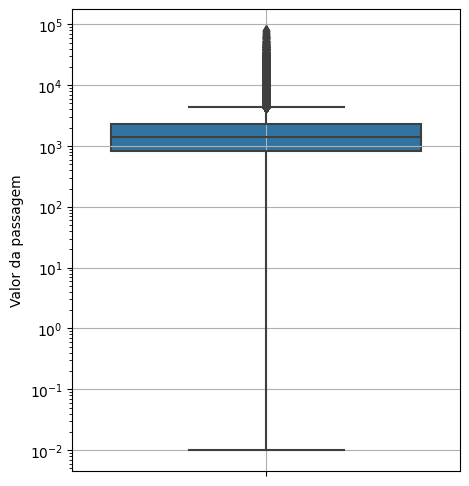

In [86]:
df_passagens_g = df_passagens_1[df_passagens_1['Valor da passagem'] > 0.001]
plt.rcParams['figure.figsize'] = 5,6
ax = sns.boxplot(y=df_passagens_g['Valor da passagem'])
ax.set_yscale('log')
#ax.plot(x=[-1000, 1000], y=[2000,2000], color='red', linewidth=2, markersize=12)
plt.grid(True)
plt.show()

In [87]:
colunas_gb = ['País - Origem ida', 'UF - Origem ida', 'Cidade - Origem ida',
       'País - Destino ida', 'UF - Destino ida', 'Cidade - Destino ida']

colunas_selecao = ['País - Origem ida', 'UF - Origem ida',
                   'Cidade - Origem ida',
       'País - Destino ida', 'UF - Destino ida',
                   'Cidade - Destino ida', 'Valor da passagem']

df_passagens_1[colunas_selecao]\
    .groupby(colunas_gb, as_index=False)\
    .agg(['count', 'mean', 'median'])\
    .sort_values(('Valor da passagem', 'count'), ascending=False)\
    .head(10)

Valor da passagem  \
                                                                                                                              count   
País - Origem ida UF - Origem ida   Cidade - Origem ida País - Destino ida UF - Destino ida  Cidade - Destino ida                     
Brasil            Rio de Janeiro    Rio de Janeiro      Brasil             Distrito Federal  Brasília                         15030   
                  Distrito Federal  Brasília            Brasil             Rio de Janeiro    Rio de Janeiro                   14224   
                                                                           São Paulo         São Paulo                        13027   
                  São Paulo         São Paulo           Brasil             Distrito Federal  Brasília                         13023   
                  Rio Grande do Sul Porto Alegre        Brasil             Distrito Federal  Brasília                          4285   
                  Distrito Federal  Brasília            Brasil             Rio Grande do Sul Porto Alegre                      4133   
                  Pernambuco        Recife              Brasil             Distrito Federal  Brasília                          3881   
                  Distrito Federal  Brasília            Brasil             Pernambuco        Recife                            3679   
                                                                           Bahia             Salvador                          3556   
                  Minas Gerais      Belo Horizonte      Brasil             Distrito Federal  Brasília                          3555   

                                                                                                                                \
                                                                                                                          mean   
País - Origem ida UF - Origem ida   Cidade - Origem ida País - Destino ida UF - Destino ida  Cidade - Destino ida                
Brasil            Rio de Janeiro    Rio de Janeiro      Brasil             Distrito Federal  Brasília              1493.165988   
                  Distrito Federal  Brasília            Brasil             Rio de Janeiro    Rio de Janeiro        1445.730189   
                                                                           São Paulo         São Paulo             1512.584029   
                  São Paulo         São Paulo           Brasil             Distrito Federal  Brasília              1489.560723   
                  Rio Grande do Sul Porto Alegre        Brasil             Distrito Federal  Brasília              1715.985354   
                  Distrito Federal  Brasília            Brasil             Rio Grande do Sul Porto Alegre          1628.003612   
                  Pernambuco        Recife              Brasil             Distrito Federal  Brasília              1539.431430   
                  Distrito Federal  Brasília            Brasil             Pernambuco        Recife                1408.939388   
                                                                           Bahia             Salvador              1150.365394   
                  Minas Gerais      Belo Horizonte      Brasil             Distrito Federal  Brasília              1764.522788   

                                                                                                                             
                                                                                                                     median  
País - Origem ida UF - Origem ida   Cidade - Origem ida País - Destino ida UF - Destino ida  Cidade - Destino ida            
Brasil            Rio de Janeiro    Rio de Janeiro      Brasil             Distrito Federal  Brasília              1330.390  
                  Distrito Federal  Brasília            Brasil             Rio de Janeiro    Rio de Janeiro        1299.985  
                                     

In [88]:
df_passagens_1 = df_passagens_1[(df_passagens_1['Meio de transporte'] == 'Aéreo')]

In [89]:
df_passagens_1.shape

(307364, 20)

In [90]:
df_passagens_2 = df_passagens_1[(df_passagens_1['Cidade - Origem ida'] == 'Rio de Janeiro') & (df_passagens_1['Cidade - Destino ida'] == 'Brasília')]

In [91]:
df_passagens_2.shape

(15030, 20)

In [92]:
df_passagens_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15030 entries, 13 to 312704
Data columns (total 20 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Identificador do processo de viagem  15030 non-null  object 
 1   Número da Proposta (PCDP)            15030 non-null  object 
 2   Meio de transporte                   15030 non-null  object 
 3   País - Origem ida                    15030 non-null  object 
 4   UF - Origem ida                      15030 non-null  object 
 5   Cidade - Origem ida                  15030 non-null  object 
 6   País - Destino ida                   15030 non-null  object 
 7   UF - Destino ida                     15030 non-null  object 
 8   Cidade - Destino ida                 15030 non-null  object 
 9   País - Origem volta                  15030 non-null  object 
 10  UF - Origem volta                    15030 non-null  object 
 11  Cidade - Origem volta     

In [93]:
df_passagens_2.describe()

,Valor da passagem
count,15030.000000
mean,1493.165988
std,903.031334
min,0.000000
25%,765.920000
50%,1330.390000
75%,2022.340000
max,7117.310000


In [94]:
df_eixos = df_passagens_2.groupby(["Nome do órgão superior"]).size().to_frame()
orgaos = df_eixos.index.to_list()
df_eixos = df_eixos.reset_index(drop=True)
df_eixos.columns = ["Qtde"]
df_eixos.insert(0, "órgão superior", orgaos)
#df_eixos

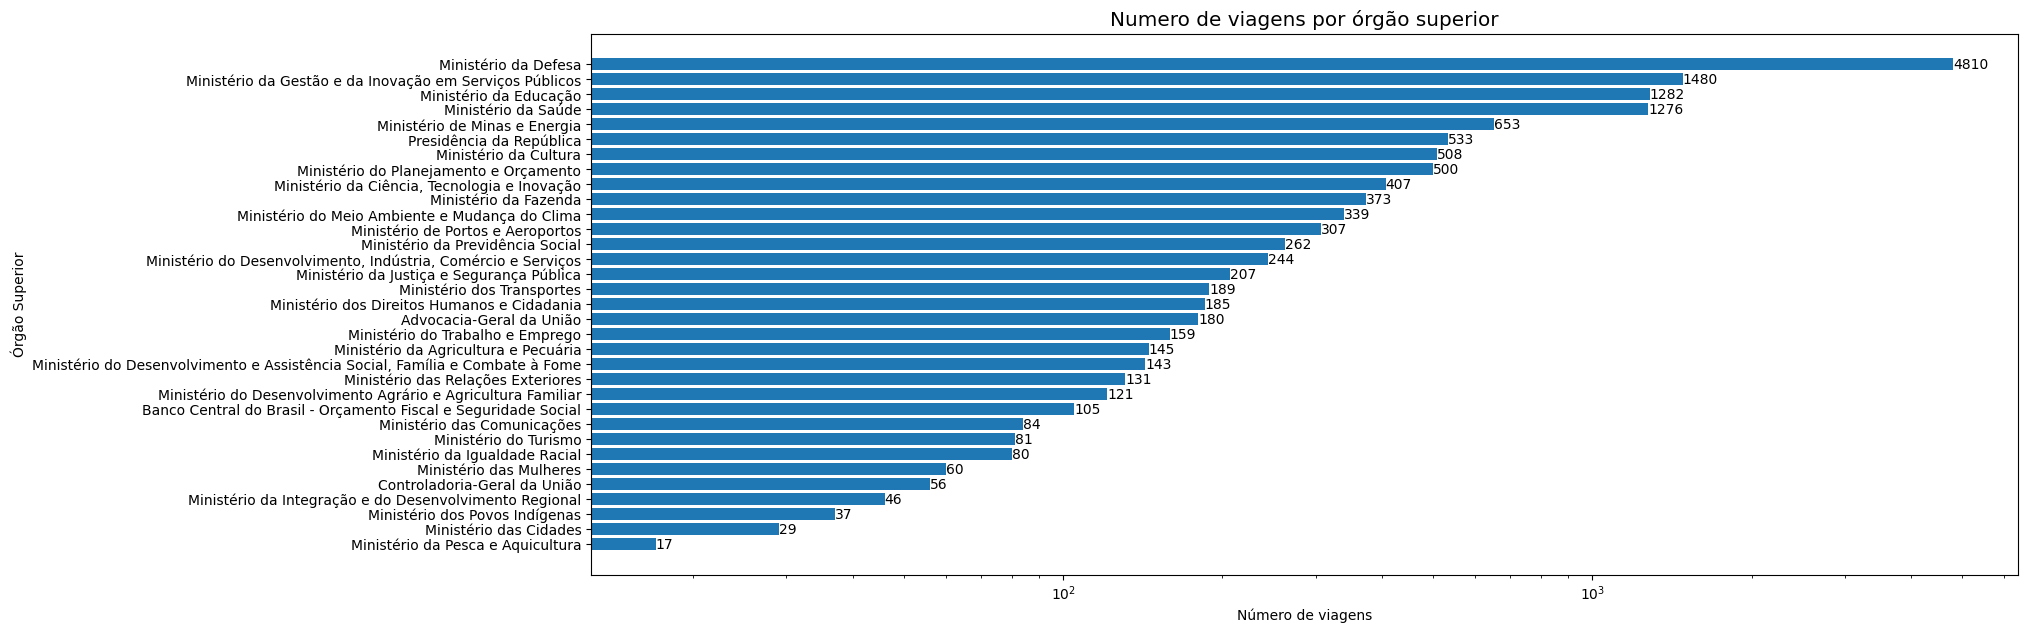

In [95]:
# criando o gráfico de barras
df_eixos_ordem_qtde = df_eixos.sort_values(["Qtde"] , ascending=True)
fig, ax = plt.subplots(figsize = (15,6))
plt.style.use("ggplot")
plt.rc("axes", facecolor="#D3D3D3", grid = True)
plt.rc("grid", color="#FFFFFF")
plt.tight_layout()
plt.barh(df_eixos_ordem_qtde["órgão superior"], df_eixos_ordem_qtde["Qtde"])
ax.bar_label(ax.containers[0])
plt.xscale('log')
plt.title("Numero de viagens por órgão superior")
plt.ylabel("Órgão Superior")
plt.xlabel("Número de viagens");
plt.show()

In [96]:
df_eixos = df_passagens_2.groupby(["Nome do órgão superior"])['Valor da passagem'].sum().to_frame()
orgaos = df_eixos.index.to_list()
df_eixos = df_eixos.reset_index(drop=True)
df_eixos.columns = ["Valor Total"]
df_eixos.insert(0, "órgão superior", orgaos)
#df_eixos

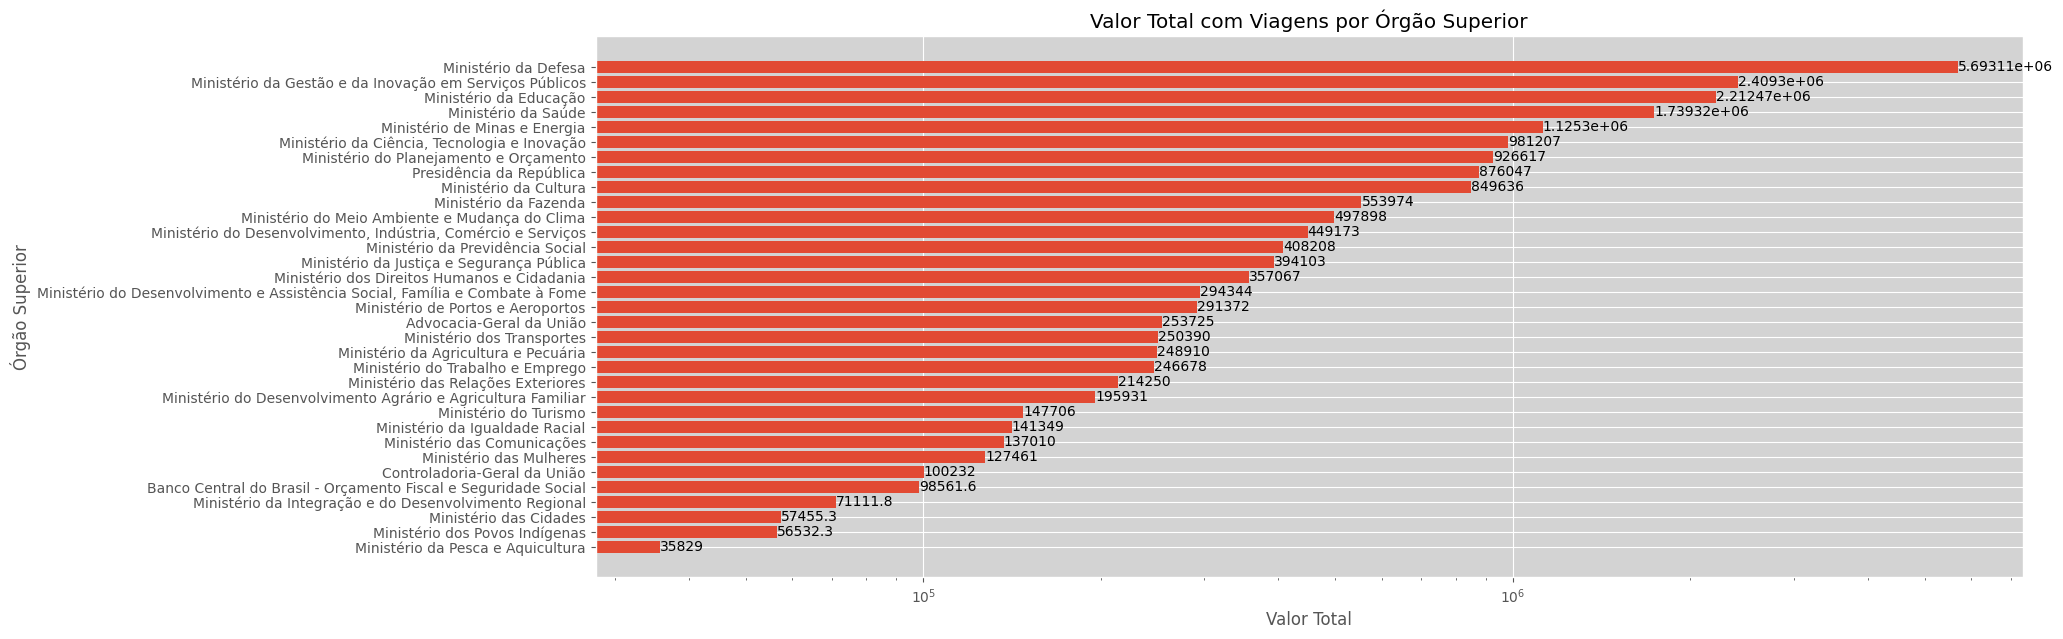

In [97]:
# criando o gráfico de barras
df_eixos_ordem_qtde = df_eixos.sort_values(["Valor Total"] , ascending=True)
fig, ax = plt.subplots(figsize = (15,6))
plt.style.use("ggplot")
plt.rc("axes", facecolor="#D3D3D3", grid = True)
plt.rc("grid", color="#FFFFFF")
plt.tight_layout()
plt.barh(df_eixos_ordem_qtde["órgão superior"], df_eixos_ordem_qtde["Valor Total"])
ax.bar_label(ax.containers[0])
plt.xscale('log')
plt.title("Valor Total com Viagens por Órgão Superior")
plt.ylabel("Órgão Superior")
plt.xlabel("Valor Total");
plt.show()

In [98]:
df_eixos = df_passagens_2.groupby(["Nome do órgao pagador"]).size().to_frame()
orgaos = df_eixos.index.to_list()
df_eixos = df_eixos.reset_index(drop=True)
df_eixos.columns = ["Qtde"]
df_eixos.insert(0, "órgao pagador", orgaos)
df_eixos_ordem_qtde = df_eixos.sort_values(["Qtde"] , ascending=False)
df_eixos_ordem_qtde = df_eixos_ordem_qtde.head(30)
df_eixos_ordem_qtde = df_eixos_ordem_qtde.sort_values(["Qtde"] , ascending=True)

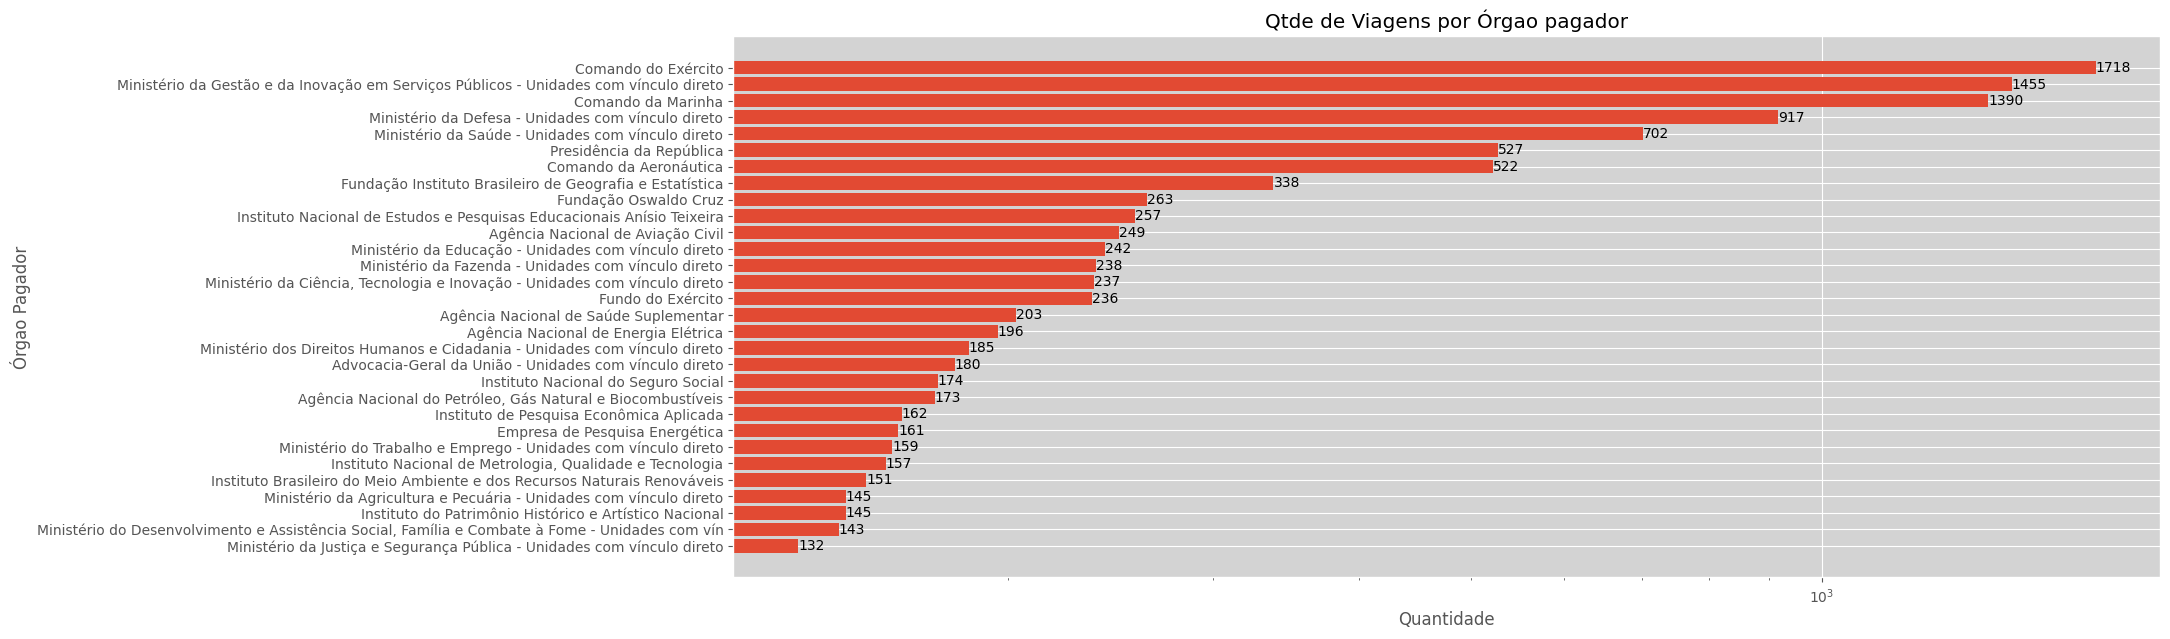

In [99]:
# criando o gráfico de barras
fig, ax = plt.subplots(figsize = (15,6))
plt.style.use("ggplot")
plt.rc("axes", facecolor="#D3D3D3", grid = True)
plt.rc("grid", color="#FFFFFF")
plt.tight_layout()
plt.barh(df_eixos_ordem_qtde["órgao pagador"], df_eixos_ordem_qtde["Qtde"])
ax.bar_label(ax.containers[0])
plt.xscale('log')
plt.title("Qtde de Viagens por Órgao pagador")
plt.ylabel("Órgao Pagador")
plt.xlabel("Quantidade");
plt.show()

In [100]:
df_eixos = df_passagens_2.groupby(["Nome do órgao pagador"])['Valor da passagem'].sum().to_frame()
orgaos = df_eixos.index.to_list()
df_eixos = df_eixos.reset_index(drop=True)
df_eixos.columns = ["Valor Total"]
df_eixos.insert(0, "órgao pagador", orgaos)
df_eixos_ordem_qtde = df_eixos.sort_values(["Valor Total"] , ascending=False)
df_eixos_ordem_qtde = df_eixos_ordem_qtde.head(30)
df_eixos_ordem_qtde = df_eixos_ordem_qtde.sort_values(["Valor Total"] , ascending=True)
#df_eixos

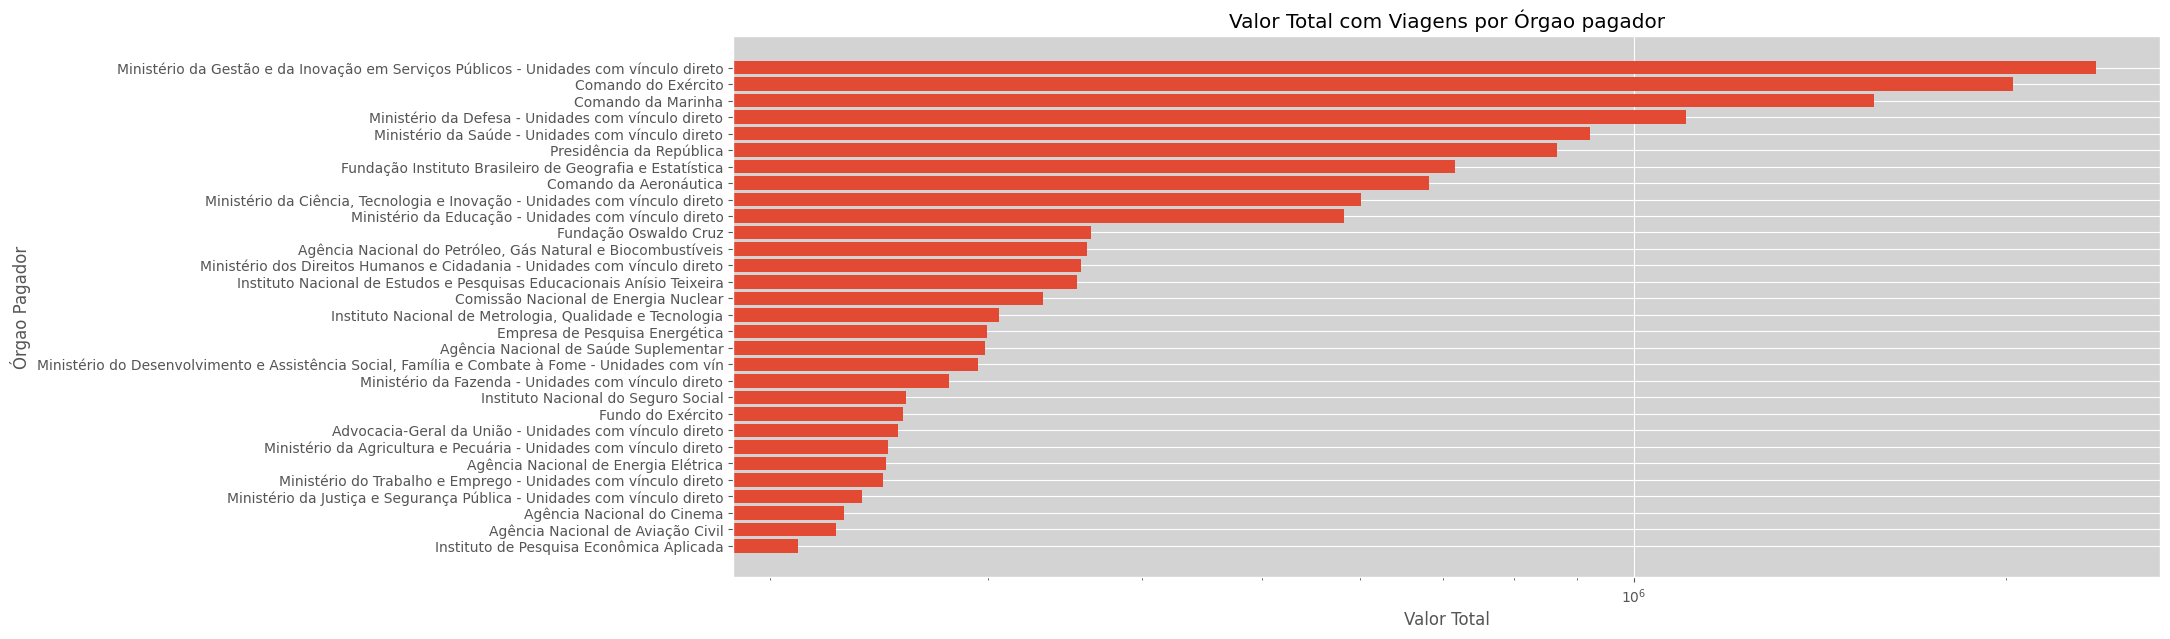

In [101]:
# criando o gráfico de barras
fig, ax = plt.subplots(figsize = (15,6))
plt.style.use("ggplot")
plt.rc("axes", facecolor="#D3D3D3", grid = True)
plt.rc("grid", color="#FFFFFF")
plt.tight_layout()
plt.barh(df_eixos_ordem_qtde["órgao pagador"], df_eixos_ordem_qtde["Valor Total"])
#ax.bar_label(ax.containers[0])
plt.xscale('log')
plt.title("Valor Total com Viagens por Órgao pagador")
plt.ylabel("Órgao Pagador")
plt.xlabel("Valor Total");
plt.show()

In [102]:
df_orgao_superior = df_passagens_2.groupby(["Nome do órgão superior"])['Valor da passagem'].agg(['count', 'mean', 'median'])
orgaos = df_orgao_superior.index.to_list()
df_orgao_superior = df_orgao_superior.reset_index(drop=True)
df_orgao_superior.columns = ["Qtde", "Media", "Mediana"]
df_orgao_superior.insert(0, "Orgao Superior", orgaos)
df_orgao_superior = df_orgao_superior.sort_values(["Media"] , ascending=True)
df_orgao_superior

,Orgao Superior,Qtde,Media,Mediana
1,Banco Central do Brasil - Orçamento Fiscal e S...,105,938.682286,751.190
21,Ministério de Portos e Aeroportos,307,949.093322,824.790
6,Ministério da Defesa,4810,1183.599609,981.975
31,Ministério dos Transportes,189,1324.813545,1213.190
15,Ministério da Saúde,1276,1363.106121,1243.050
0,Advocacia-Geral da União,180,1409.583222,1340.630
25,Ministério do Meio Ambiente e Mudança do Clima,339,1468.724366,1289.980
8,Ministério da Fazenda,373,1485.184021,1208.190
30,Ministério dos Povos Indígenas,37,1527.899189,1332.700
11,Ministério da Integração e do Desenvolvimento ...,46,1545.907826,1668.880


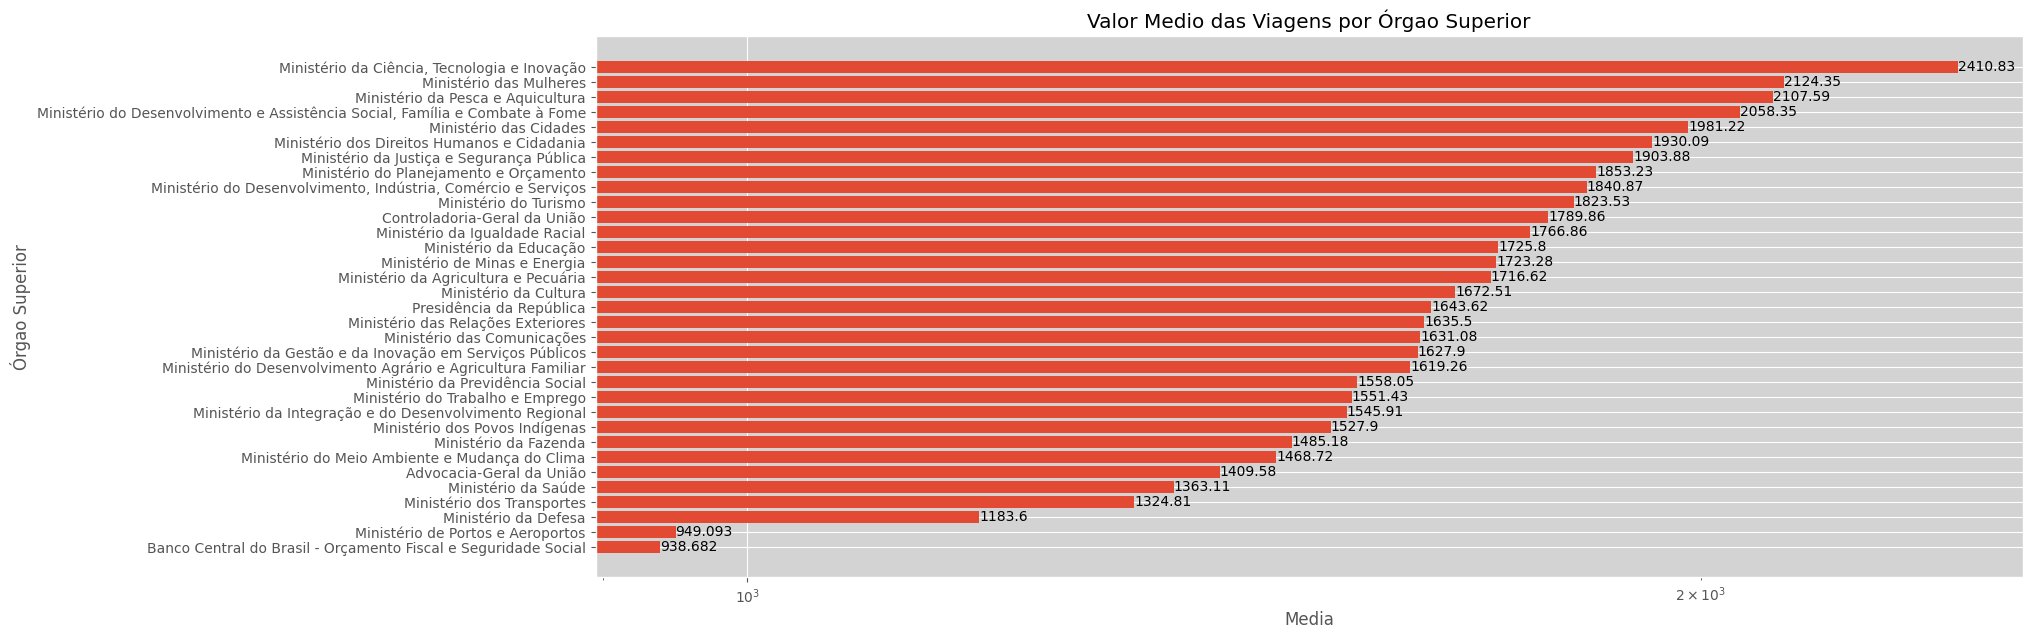

In [103]:
# criando o gráfico de barras
fig, ax = plt.subplots(figsize = (15,6))
plt.style.use("ggplot")
plt.rc("axes", facecolor="#D3D3D3", grid = True)
plt.rc("grid", color="#FFFFFF")
plt.tight_layout()
plt.barh(df_orgao_superior["Orgao Superior"], df_orgao_superior["Media"])
ax.bar_label(ax.containers[0])
plt.xscale('log')
plt.title("Valor Medio das Viagens por Órgao Superior")
plt.ylabel("Órgao Superior")
plt.xlabel("Media");
plt.show()

In [106]:
df_orgao_maior_media = df_passagens_2[df_passagens_2["Nome do órgão superior"] == "Ministério da Ciência, Tecnologia e Inovação"]

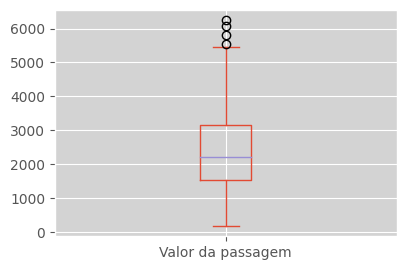

In [108]:
# Boxplot
df_orgao_maior_media.plot(kind = 'box', subplots = True, layout = (3,3), sharex = False, sharey = False, figsize = (15,10))
plt.show()

In [109]:
df_orgao_menor_media = df_passagens_2[df_passagens_2["Nome do órgão superior"] == "Banco Central do Brasil - Orçamento Fiscal e Seguridade Social"]

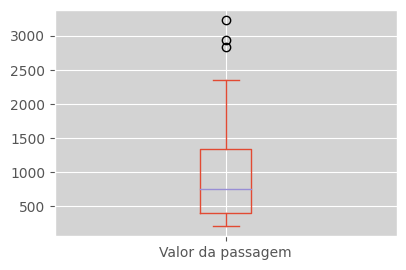

In [111]:
# Boxplot
df_orgao_menor_media.plot(kind = 'box', subplots = True, layout = (3,3), sharex = False, sharey = False, figsize = (15,10))
plt.show()